# Cardio Good Fitness Background
Cardio Good Fitness is a retail fitness store that sells 3 styles of treadmill products. The store is looking to grow its business setting the stage for continued growth and possible expansion. A set of information on customers who recently bought treadmills was gathered, and you have been tasked with profiling the customers, identifying the differences in customers of each product by performing univariate and multi-variate analyses.

# Objective
Generate a set of actionable insights and recommendations that will help the company in targeting new customers. Explore the dataset and practice extracting basic observations about the data.

# Questions
* What variable most influences product purchases?
* What are the demographic differences among the customers who have purchased treadmills?
* Are there any unexpected correlations between variables?
* What are your recommendations to Cardio Good Fitness management for capitalizing on customer demographic splits? 

# Data
Dataset contains the following variables:
* Product - the model no. of the treadmill
* Age - in # of years, of the customer
* Gender - of the customer
* Education - in no. of years of the customer
* Marital Status - of the customer
* Usage - Avg. # times the customer wants to use the treadmill every week
* Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
* Income - of the customer (yearly household income)
* Miles- expected to run (not specified in prompt, but values are reasonable for avg/month. User 'Academic Support 8' in the discussion forum said this was miles avg/ week, but that makes it a completely unrealistic number of miles that would be run per use)

## Import necessary libraries

In [1]:
import warnings
warnings.filterwarnings('ignore') #ignore warnings on future library updates that might cause problems with the code
#Import key libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#enable plotting in Jupyter notebook
%matplotlib inline 

## Read in dataset

In [2]:
cgf=pd.read_csv('CardioGoodFitness.csv')

In [3]:
#create a copy of dataset to another variable to avoid corrupting original data
df=cgf.copy()

In [4]:
# Looking at the first 10 dataframe observations
df.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
5,TM195,20,Female,14,Partnered,3,3,32973,66
6,TM195,21,Female,14,Partnered,3,3,35247,75
7,TM195,21,Male,13,Single,3,3,32973,85
8,TM195,21,Male,15,Single,5,4,35247,141
9,TM195,21,Female,15,Partnered,2,3,37521,85


**Observations**
* There are 9 customer variables
* Product, Gender, Fitness,and Marital Status are categorical variables.
* Fitness uses numbers to represent categories of fitness 
* Age, Education, Usage, Income, and Miles are numerical variables
* Fitness is taken on a self-assesed scale of 1-5
* Usage identifies the Avg. # times the customer wants to use the treadmill every week
* Product is the treadmill product number

## Check Shape of the dataset

In [5]:
df.shape

(180, 9)

* Dataset has 180 rows and 9 columns

## Check the dataframe info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [7]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

**Observations**
* Columns have 180 observations, with no indications that data is missing.
* Product, Gender, and Marital status read as objects, but should be categorical variables.
* All numerical variables are int data type, whole integers

## Inspecting the data further

In [8]:
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


* Fitness values are self assessed and uses numerical values to represent a perceived category of fitness, should be treated as a categorical variable.
* 3 unique treadmill products sold by the store.
* education ranges from high school grads (12) through to phd level (21).
* Miles values are very dependent on units. Miles per month produces reasonable (if maybe slightly optimistic values), whereas miles/week is very unrealistic.
* Most of the customers have completed some level of college education.

In [9]:
df['Usage'].unique()
#customers plan to use product between 2 and 7x per week. 
#Not categorical, but numerical and discrete.

array([3, 2, 4, 5, 6, 7], dtype=int64)

In [10]:
df['Fitness'].unique()
#all fitness levels identified in dataset

array([4, 3, 2, 1, 5], dtype=int64)

In [11]:
df['Education'].unique()
# education ranges from high school grads through to PhD level.

array([14, 15, 12, 13, 16, 18, 20, 21], dtype=int64)

## Fix Datatypes

In [12]:
# Fitness, Product, Gender, and Marital Status should be converted to categories
# Classes in Categorical columns will be represented by a number
# Allows for greater utility if data is used for model building
df['Product'] = df.Product.astype('category')
df['Gender'] = df.Gender.astype('category')
df['MaritalStatus']= df.MaritalStatus.astype('category')
df['Fitness'] = df.Fitness.astype('category')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    category
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(4), int64(5)
memory usage: 8.3 KB


* Data type of all columns have been fixed.

# EDA

## Looking at numerical variables

In [14]:
#Doing univariate analysis to look at central tendency and dispersion.
#Writing the function allows to automate the process of creating a boxplot and histogram for 
#numerical variables.
#Function takes numerical column as input and creates histogram and boxplots
def histobox(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creates the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a triangle will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add dashed green mean line to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add black median line to the histogram

## Observations on Age

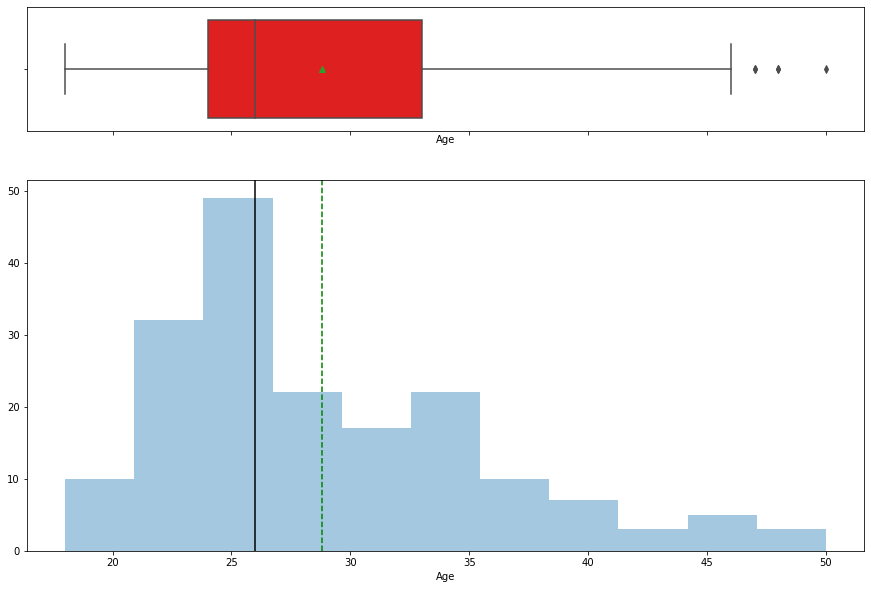

In [15]:
histobox(df.Age)
plt.savefig('Customer_Ages.png')

**Observations**
* Age distribution is right skewed (Positive)
* Customers range in ages between 18 and 50 years old
* Only 3 outliers on the upper end of the ages, no outliers on the lower end
* Median age ~26, Mean Age ~28

## Observations on Education

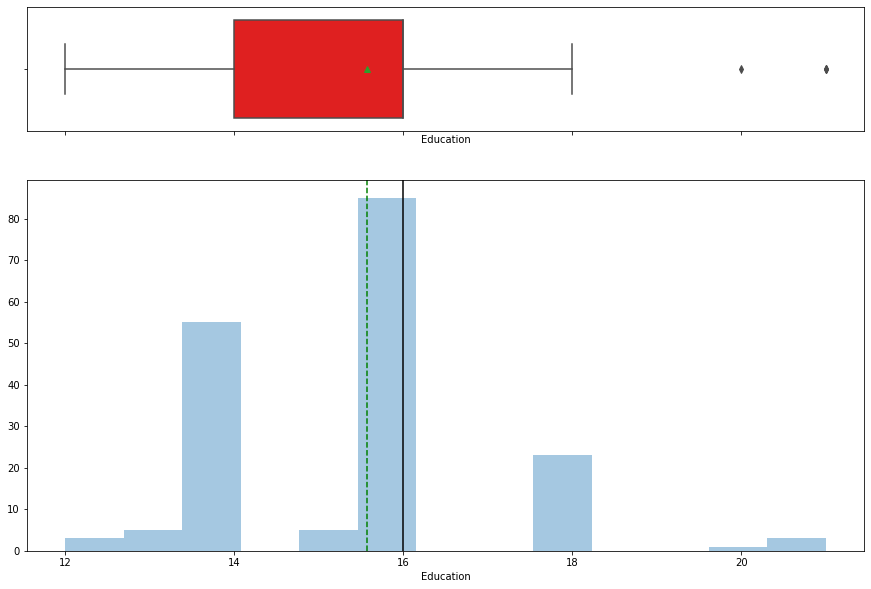

In [16]:
histobox(df.Education)
plt.savefig('Customer_Education.png')

**Observations**
* Education looks to be more clustered than distributed, merits treatment as a categorical
* variable with customers split into 3 groups

In [17]:
df['Education'].unique()

array([14, 15, 12, 13, 16, 18, 20, 21], dtype=int64)

In [18]:
# Define a function to cluster education into 3 categories:
# High School and 2 year degrees (12-14)
# Bachelors Degree(15, 16)
# Masters degrees and PhDs (18-21)
def grads(x):
    if x in (12, 13, 14):
        return 'AS and HS'
    elif x in (15, 16):
        return "Bachelors"
    else: return 'MS and PhD'

#Apply Function to df, create new column,and type it as a category     
df['Education_group'] = df['Education'].apply(grads)
df['Education_group'] = df.Education_group.astype('category')

# removing original Education column as it will not be required for further analysis
df.drop('Education',axis=1,inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Product          180 non-null    category
 1   Age              180 non-null    int64   
 2   Gender           180 non-null    category
 3   MaritalStatus    180 non-null    category
 4   Usage            180 non-null    int64   
 5   Fitness          180 non-null    category
 6   Income           180 non-null    int64   
 7   Miles            180 non-null    int64   
 8   Education_group  180 non-null    category
dtypes: category(5), int64(4)
memory usage: 7.2 KB


In [19]:
df['Education_group'].unique()

['AS and HS', 'Bachelors', 'MS and PhD']
Categories (3, object): ['AS and HS', 'Bachelors', 'MS and PhD']

## Observations on Usage

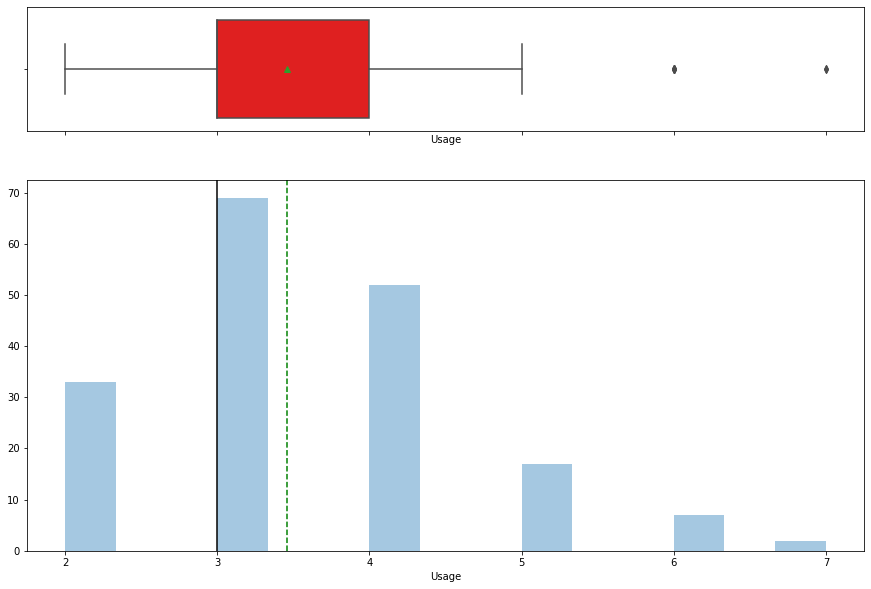

In [20]:
histobox(df.Usage)
plt.savefig('Customer_Usage.png')

**Observations**
* Both the mean and the median fall around the middle of the usage variable.
* ~3 days of exercise per week seems reasonable.
* 6 and 7 days per week of usage are outliers, which makes sense as people often take weekends off from exercise.
* Interesting to note that even people with a low sense of their personal fitness are still intending to use the treadmill twice per week.

## Observations on Income

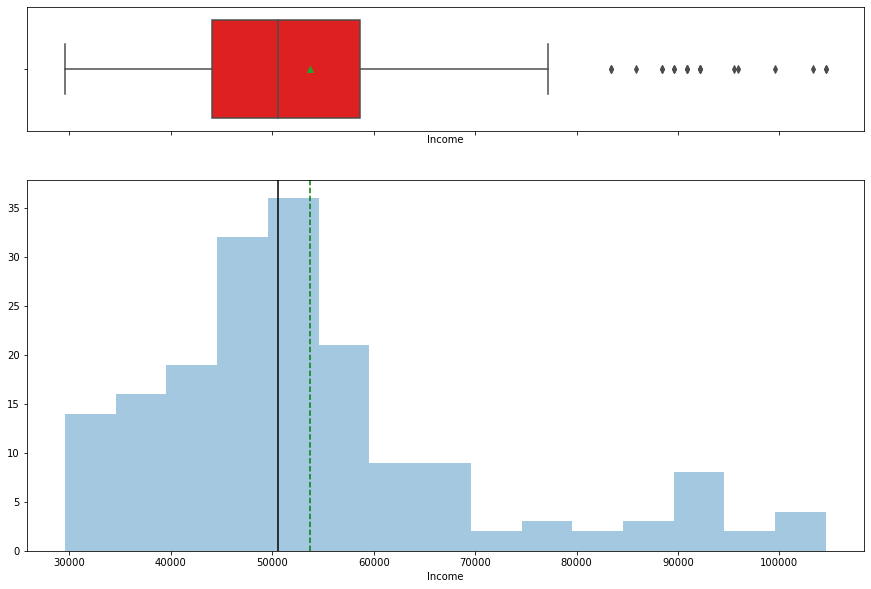

In [21]:
histobox(df.Income)
plt.savefig('Customer_Income.png')

**Observations**
* There a numerous outliers on the right of particularly affluent customers.
* Both the mean and median are a little over $50000/year
* Income is slightly right skewed. 

## Observations on Expected Miles

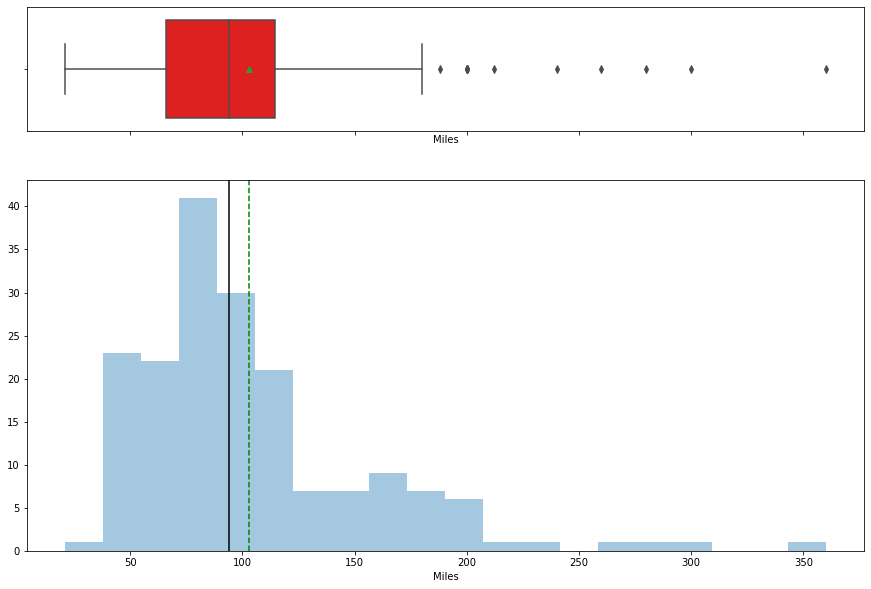

In [22]:
histobox(df.Miles)
plt.savefig('Customer_Mileage.png')

**Observations**
* Expected miles is right skewed.
* Mean is slightly over 100 miles, median is just under 100 miles
* If expected miles run units are avg/week, show either a very high degree of optimism, or a data entry error.
* If expected miles run units are avg/month, they may be on the more optimistic side, but realistic.

## Categorical Variables

In [23]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage

## Observations on Product

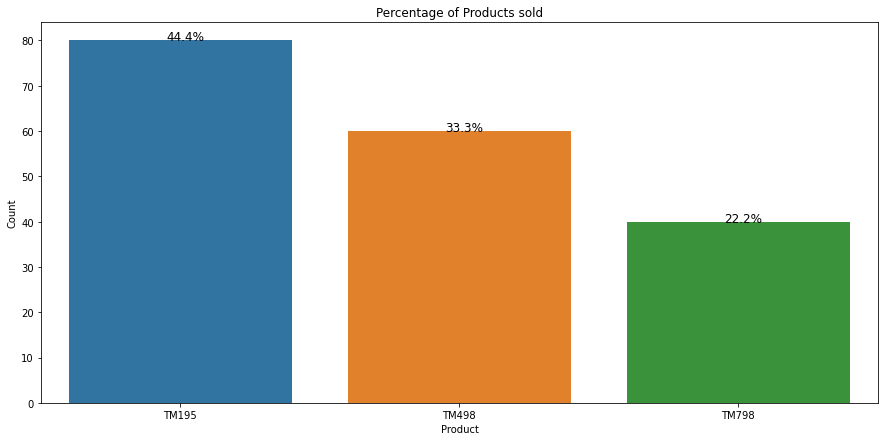

In [24]:
plt.figure(figsize=(15,7))
ax = sns.countplot(df['Product'])
plt.xlabel('Product')
plt.ylabel('Count')
bar_perc(ax,df['Product'])
plt.title('Percentage of Products sold')
plt.savefig('products_sold.png')

**Observations**
* Product TM195 was the best seller among the 3 treadmills

## Observations on Gender

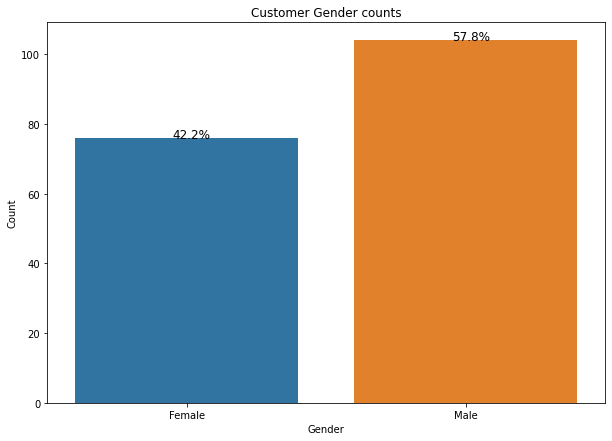

In [25]:
plt.figure(figsize=(10,7))
ax = sns.countplot(df['Gender'])
plt.xlabel('Gender')
plt.ylabel('Count')
bar_perc(ax,df['Gender'])
plt.title('Customer Gender counts')
plt.savefig('Customer_gender.png')

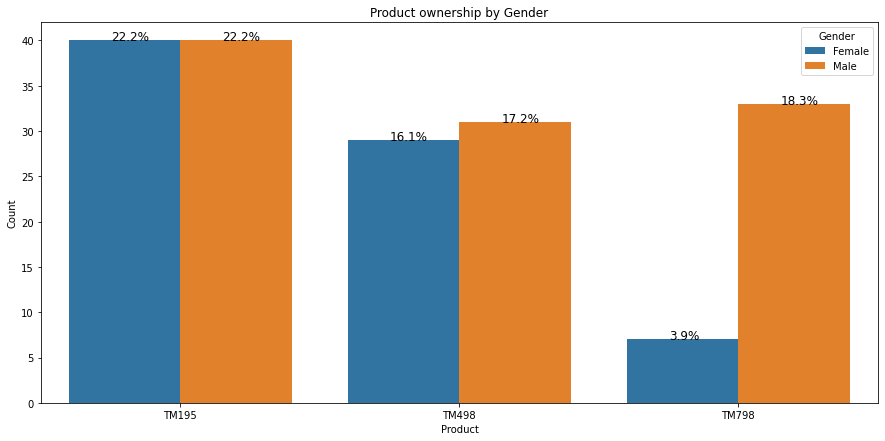

In [26]:
plt.figure(figsize=(15,7))
ax = sns.countplot(df['Product'], hue= df['Gender'])
plt.xlabel('Product')
plt.ylabel('Count')
bar_perc(ax,df['Product'])
plt.title('Product ownership by Gender')
plt.savefig('products_by_gender.png')

**Observations**
* Overall more men than women were purchasing treadmill products.
* Product TM195 was the best seller among Males and Females, with an even split between the two genders.
* Product TM498 Sold slightly more with Males.
* Product TM798 sold much better with Males than females, with Males TM798 sales surpassing sales of Product TM498.

## Observations on Marital Status

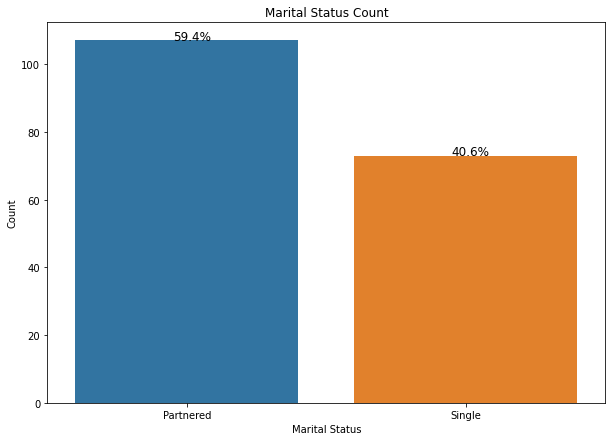

In [27]:
plt.figure(figsize=(10,7))
ax = sns.countplot(df['MaritalStatus'])
plt.xlabel('Marital Status')
plt.ylabel('Count')
bar_perc(ax,df['MaritalStatus'])
plt.title('Marital Status Count')
plt.savefig('Customer_marriage.png')

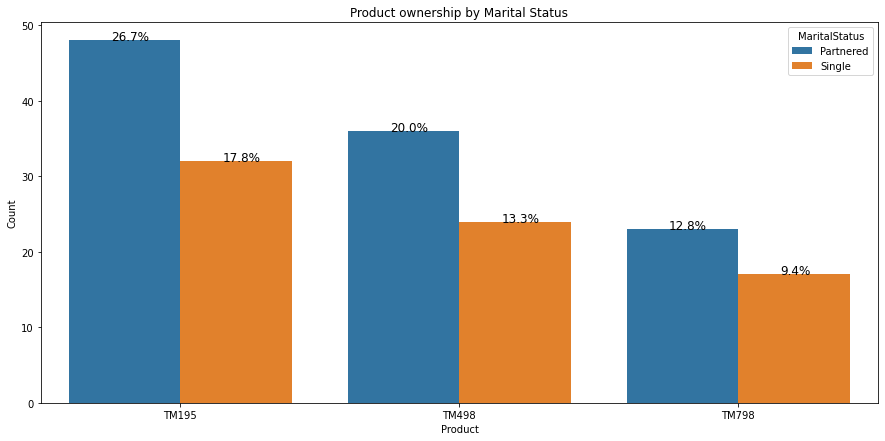

In [28]:
plt.figure(figsize=(15,7))
ax = sns.countplot(df['Product'], hue= df['MaritalStatus'])
plt.xlabel('Product')
plt.ylabel('Count')
bar_perc(ax,df['Product'])
plt.title('Product ownership by Marital Status')
plt.savefig('product_by_maritalS.png')

**Observations**
* There were significantly more partnered than single customers.
* Partnered customers purchased more of each product than single customers, and continued the trend of purchasing Product TM195.
* Combined with the previous observation, a significant number of customers were partnered men.


## Observations on Education

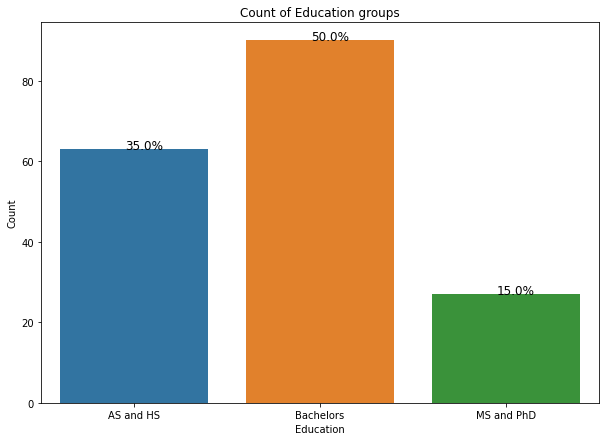

In [29]:
plt.figure(figsize=(10,7))
ax = sns.countplot(df['Education_group'])
plt.xlabel('Education')
plt.ylabel('Count')
bar_perc(ax,df['Education_group'])
plt.title('Count of Education groups')
plt.savefig('Customer_ed_cat.png')

**Observations**
* Majority of customers (85%) had a maximum of 16 years education.
* Small group had a higher level (Masters degree or Doctorate).

## Observations on Fitness

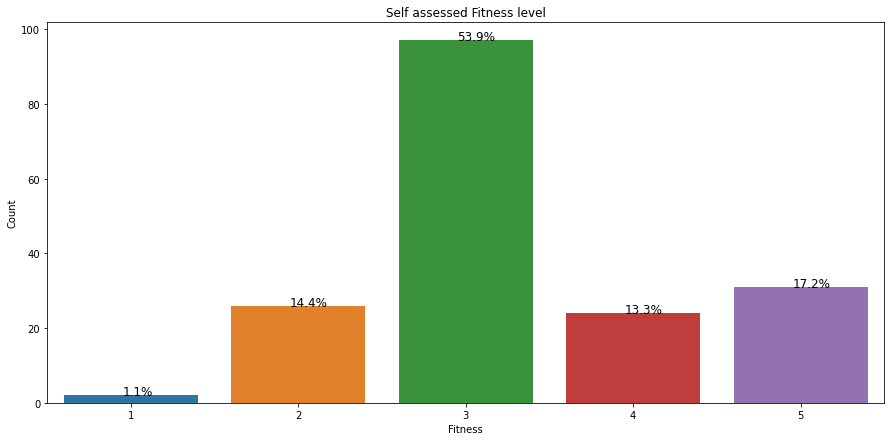

In [30]:
plt.figure(figsize=(15,7))
ax = sns.countplot(df['Fitness'])
plt.xlabel('Fitness')
plt.ylabel('Count')
plt.title('Self assessed Fitness level')
bar_perc(ax,df['Fitness'])
plt.savefig('fitness_cat.png')

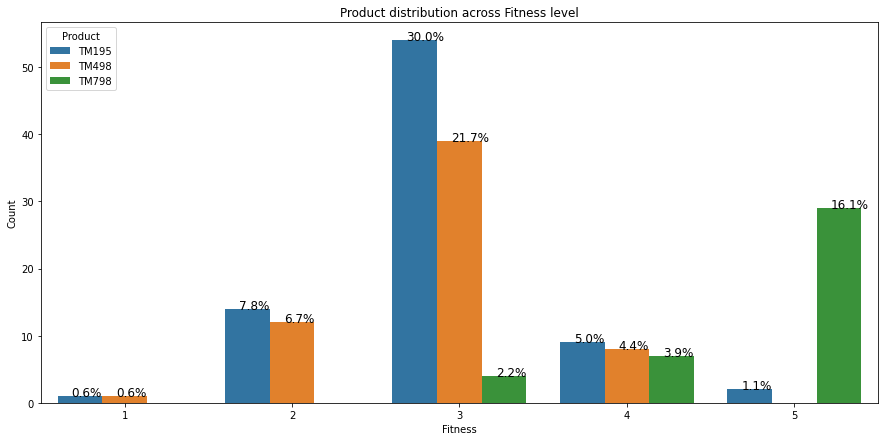

In [51]:
plt.figure(figsize=(15,7))
ax = sns.countplot(df['Fitness'], hue= df['Product'])
plt.xlabel('Fitness')
plt.ylabel('Count')
plt.title('Product distribution across Fitness level')
bar_perc(ax,df['Fitness'])
plt.savefig('productsbyfitness.png')

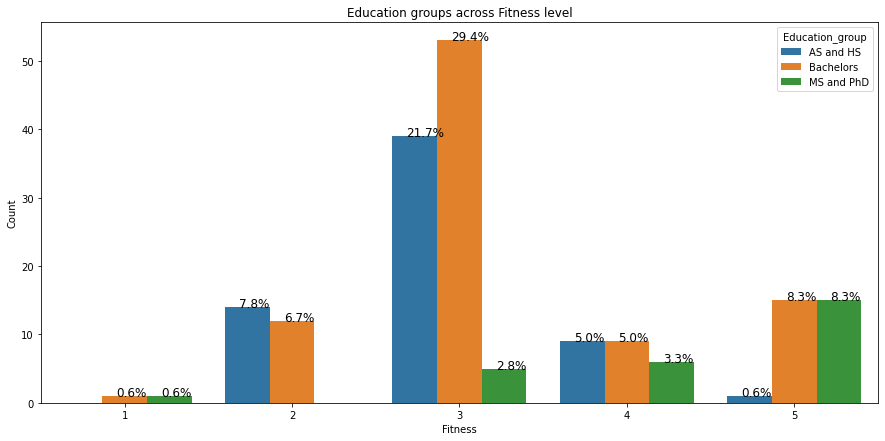

In [52]:
plt.figure(figsize=(15,7))
ax = sns.countplot(df['Fitness'], hue= df['Education_group'])
plt.xlabel('Fitness')
plt.ylabel('Count')
plt.title('Education groups across Fitness level')
bar_perc(ax,df['Fitness'])
plt.savefig('productsbyeducation.png')

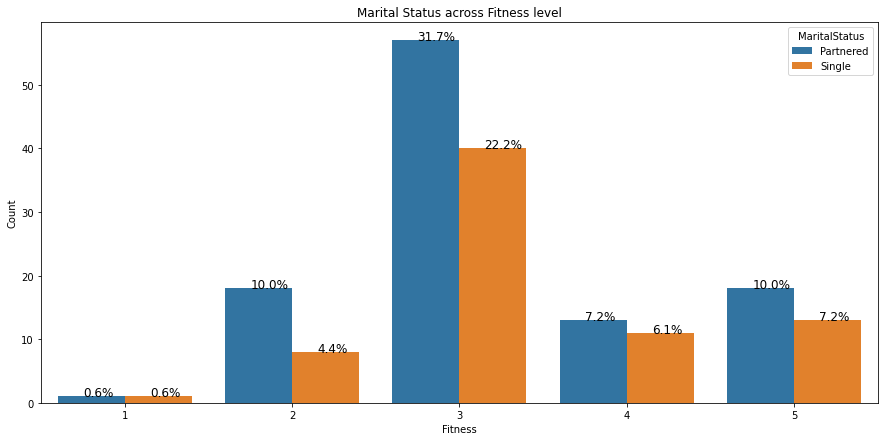

In [33]:
plt.figure(figsize=(15,7))
ax = sns.countplot(df['Fitness'], hue= df['MaritalStatus'])
plt.xlabel('Fitness')
plt.ylabel('Count')
plt.title('Marital Status across Fitness level')
bar_perc(ax,df['Fitness'])
plt.savefig('fitness_by_marriage.png')

**Observations**
* Overall the customer base has a positive assessment of their fitness levels, with the majority identifying at value 3, the moderate level of fitness.
* Not many customers self identify as the least fit level (1). This can be expected as an unfit person would be unlikely to go into a fitness store to buy a treadmill.
* The self assessed fittest group (5) showed a strong preference for Product TM798, the only time a group preferred something other than Product TM195.
* Customers with a self-assessed higher fitness level also normally had a higher education level, except the only customers with poor fitness were from the higher education levels.
* The fitness and education distribution makes sense as jobs with pronounced levels of physical exertion and manual labor typically correspond with fewer years of education. Higher levels of education can mean a greater awareness of the importance of physical fitness, but also sedentary jobs.

## Bivariate Analysis

# Correlation

In [34]:
#Group the datasets numerical variables
quant = df[['Age', 'Usage', 'Income', 'Miles']]
#Check the correlation between variablesb
cor =quant.corr()
print(cor)

             Age     Usage    Income     Miles
Age     1.000000  0.015064  0.513414  0.036618
Usage   0.015064  1.000000  0.519537  0.759130
Income  0.513414  0.519537  1.000000  0.543473
Miles   0.036618  0.759130  0.543473  1.000000


# Heatmap

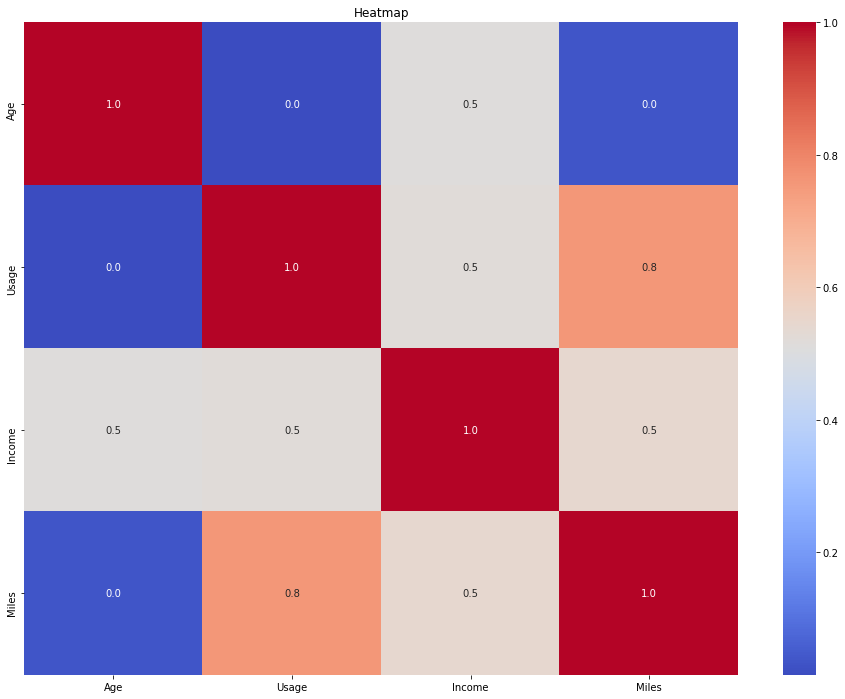

In [35]:
# plot the heatmap
plt.figure(figsize=(16,12))
sns.heatmap(cor, annot=True,cmap='coolwarm',
        fmt=".1f",
        xticklabels=cor.columns,
        yticklabels=cor.columns)
plt.title('Heatmap')
plt.savefig('heatmap.png')

**Observations**
* Highest positive correlation between usage and estimated weekly mileage. This makes sense even if the mileage is an overestimation. High mileage totals can't be acheived without high usage.
* Not a strong correlation between age and usage, and usage and miles, which is surprising. I was expecting younger buyers to be using the treadmills more.
* No negative correlations noted on the plot.
* Higher correlation between income and usage and miles. This makes sense as higher income jobs often come with steady schedules and more time for leisure activities like exercise.
* Remember correlation does not equal causation

## Bivariate Scatter Plots

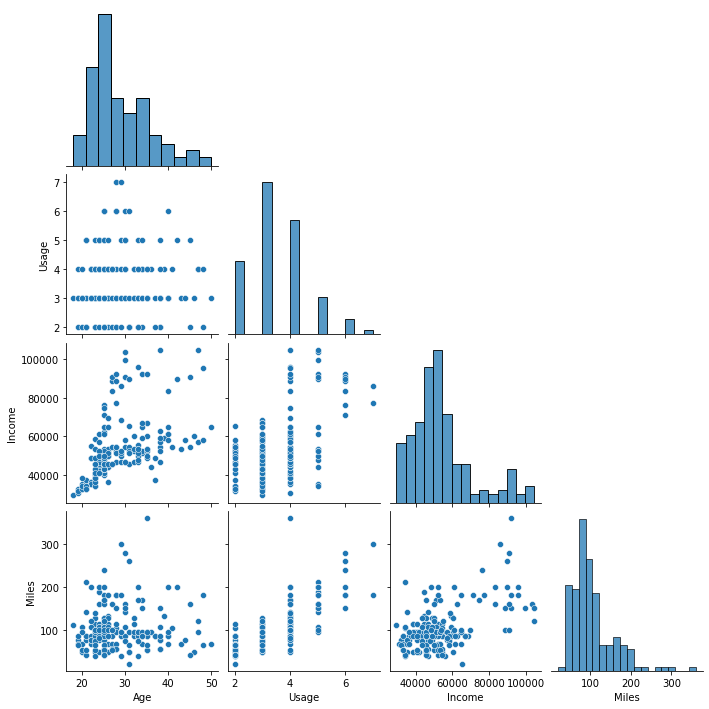

In [45]:
sns.pairplot(df, corner=True)
plt.savefig('bivariate.png')

**Observations**
* Similar observations as the correlation plot and heatmap.
* Strong correlations noted between income, usage, and miles. Strong correlation between Income and Age until a certain age is reached and 2 different trends emerge.

## Multivariate Analysis

## Age vs Income vs Product

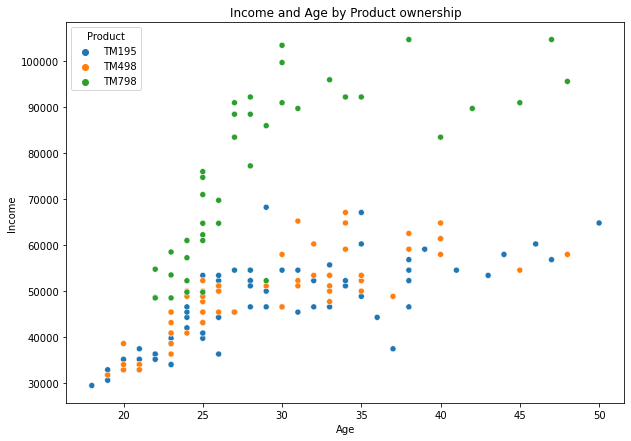

In [37]:
plt.figure(figsize=(10,7))
sns.scatterplot(data = df, x = 'Age', y = 'Income', hue = 'Product')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Income and Age by Product ownership')
plt.savefig('scatter_product.png')

<Figure size 1080x504 with 0 Axes>

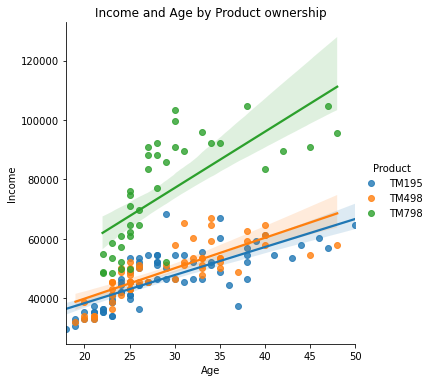

In [38]:
plt.figure(figsize=(15,7))
sns.lmplot( x = 'Age', y = 'Income', hue = 'Product', data = df)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Income and Age by Product ownership')
plt.savefig('scatter_product_reg.png')

# Income across Products 

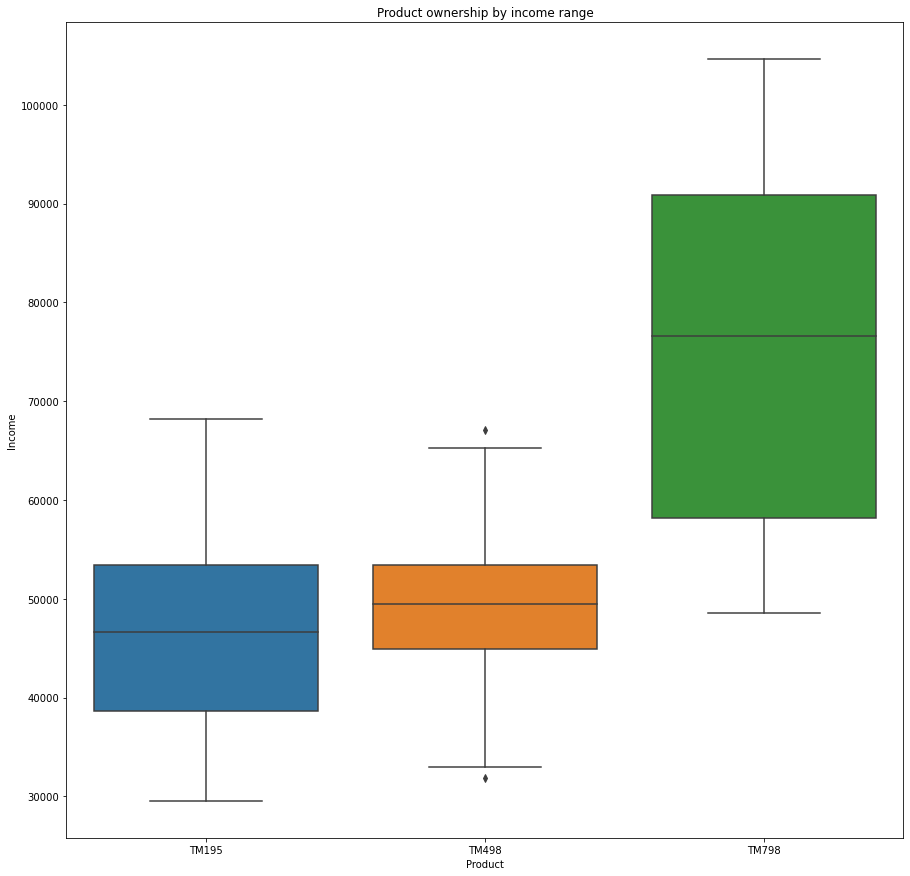

In [39]:
plt.figure(figsize=(15,15))           
sns.boxplot(df['Product'],df['Income'])
plt.ylabel('Income')
plt.xlabel('Product')
plt.title('Product ownership by income range')
plt.savefig('Product_ownership_by_income_box.png')

**Observations**
* Low to moderate incomes favor Product TM195, while higher incomes favor Product TM798.
* Some on the higher end of the moderate income range purchased Product TM498.
* TM195 covers a range from low to upper moderate income IQR, TM498 covers the upper moderate income IQR. These two products cover a wide income range, while TM798 sits at a much higher income IQR.

## Age vs Income vs Education_Group

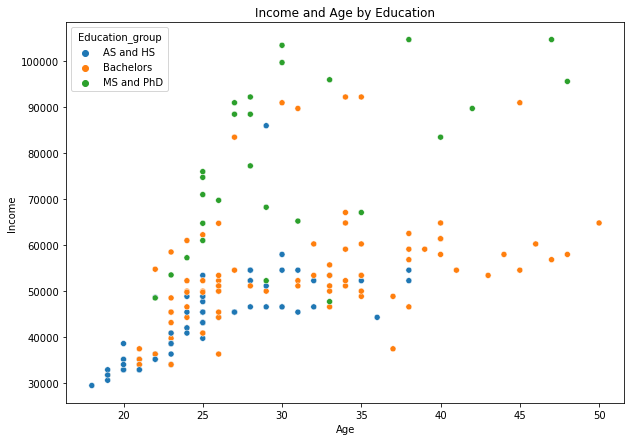

In [40]:
plt.figure(figsize=(10,7))
sns.scatterplot(data = df, x = 'Age', y = 'Income', hue = 'Education_group')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Income and Age by Education')
plt.savefig('scatter_ed.png')

## Age vs Income vs Fitness

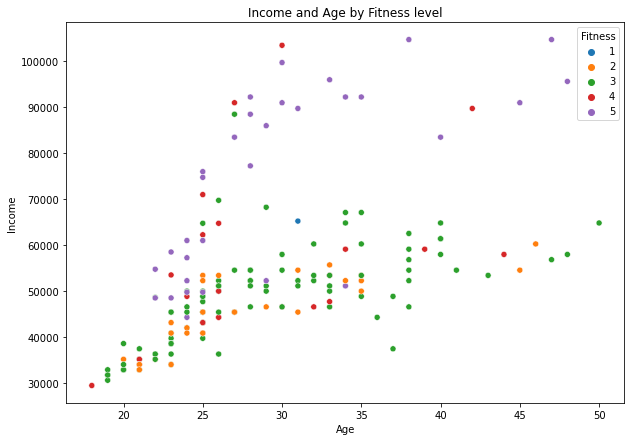

In [41]:
plt.figure(figsize=(10,7))
sns.scatterplot(data = df, x = 'Age', y = 'Income', hue = 'Fitness')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Income and Age by Fitness level')
plt.savefig('scatter_fitness.png')

<Figure size 1080x504 with 0 Axes>

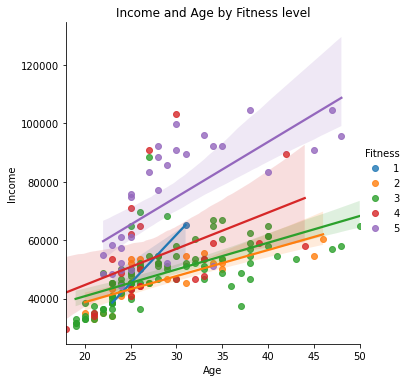

In [42]:
plt.figure(figsize=(15,7))
sns.lmplot( x = 'Age', y = 'Income', hue = 'Fitness', data = df)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Income and Age by Fitness level')
plt.savefig('scatter_fitness_reg.png')

Text(0.5, 1.0, 'Income and Age by Marital Status')

<Figure size 1080x504 with 0 Axes>

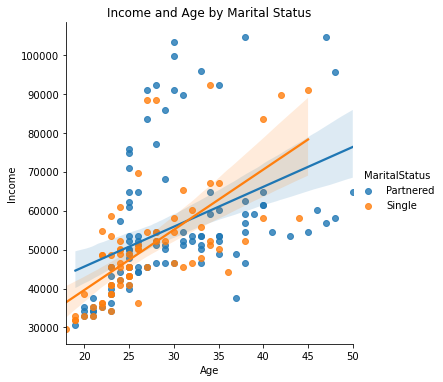

In [43]:
plt.figure(figsize=(15,7))
sns.lmplot( x = 'Age', y = 'Income', hue = 'MaritalStatus', data = df)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Income and Age by Marital Status')

Text(0.5, 0, 'Marital Status')

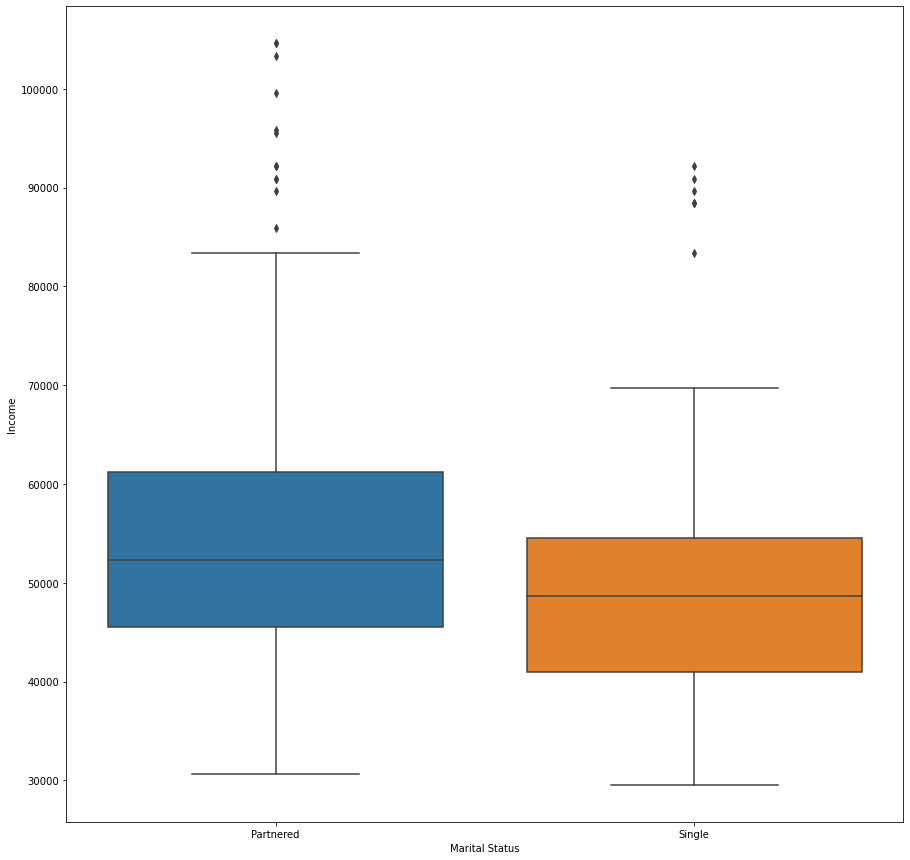

In [44]:
plt.figure(figsize=(15,15))           
sns.boxplot(df['MaritalStatus'],df['Income'])
plt.ylabel('Income')
plt.xlabel('Marital Status')
#plt.title('Product ownership by income')

**Observations**
* As highlighted with the correlation plot, Age and Income have ahigh positive correlation. 
* This positive correlation carries over to categorical variables like Product preferences, Fitness, and Education Group.
* Higher income levels have strong positive correlations with Higher fitness levels, higher education levels, and Product types.
* The IQR of income has some overlap between partnered customers and single customers, so less of a simple categorical breakout as some of the other categorical variables with income.

# **Conclusion and Recommendations**
## Conclusion
I analysed a dataset of 180 customers of retail fitness store Cardio Good Fitness.
The data was a mixture of Discrete and Continuous numerical variables, and categorical variables. Yearly household income and product type are the key features of the dataset. Income has a very high positive correlation with other numerical variables and when used with categorical variables clearly clusters the customers into groups.

Final conclusions:
1. Numerical variables have a positive skew with higher mean values than the median values. Only the customer's age and (possibly) income were objective values, others such as Fitness level, treadmill usage, and Miles run/week are subjective and hard to take as definitive.
2. The variable that most stands out and predicts product purchases is income. Higher incomes tend to purchase TM798, while lower incomes favor TM195.
3. Miles expected to run needs to have its units specified. If unit is Miles run/week, values were very high and unrealistic, with mean and median both ~100. Combined with usage rates, it is highly unlikely that such a large group of customers who self assess as moderately fit (3) would be running close to 30+ miles per workout. If the units are Miles run/ month then the estimates seem much more realistic.
4. More male customers were surveyed than female customers, and more customers were partnered than were single.
5. Partnered customers have a combined household income, resulting in more money for discretionary spending on products like fitness equiptment.
6. Product TM195 is the best seller overall, leading sales among genders and both partnered and single customers.Product TM498 is the second most popular and appeals to a similar demographic as TM195
7. Product TM798 is favored by customers with higher incomes, higher assessments of personal fitness, and higher education levels. TM798 is likely the most expensive of the offered treadmills.
8. The fittest group (5) showed a strong preference for Product TM798. Customers with a higher fitness level also had a higher education level. Higher levels of education translate to jobs with higher income, providing more money and time for recreational activities and disposable income.
9. Collecting more data will allow for a more balanced dataset that might show less positive bias. Finding a way to collect less subjective numerical data will help to elimate skewness, potential personal bias, and provide more accurate usage and activity levels. Units for each variable are important and focusing on that specific can help in the future.


## Recommendation

1. TM195 is the best selling product, but appeals to the same demographics as TM498. Consider removing TM498 from store. Customers on the high side of the moderate income IQR present potential new buyers for TM798. Customers who don't want to spend more on a treadmill still have an affordable treadmill option (TM195) with a similar feature set.
2. Try selling a new product with the treadmills that tracks usage metrics. Sales pitch to customers can focus around the ability to accurately track these metrics and find a tangible path to fitness improvement.
3. Re-work marketing and sales strategies to target students at 4-year universities. They will be graduating and will need access to fitness equipment now that they won't be able to access university athletic center resources. Market TM195 and its affordability for new grads. 
4. Have a concurrent campaign focused on the high fitness corporate professional highlighting the features favored by fit professionals who can afford a higher caliber of treadmill(TM798). Specifically focus on perks of having a high-end treadmill at home thus avoiding specific trips and costs associated with gym memberships. Also target partnered customers (typically have 2 incomes) for the higher end model highlighting money saved on fitness equipment vs. 2 monthly gym memberships. 
5. After consolidating treadmills and expanding to offer fitness metric tracker products in the store see the feasibility of opening another store in a location near a university campus.
6. Add information about dates and times of sales to identify key times and further classify groups and the specific products they are looking to buy.


## Further Analysis
1. Figure out what happened with the miles/week. Was it misentered when the dataset was created, or were the customers embellishing.
2. find a way to incorporate data from a smartwatch or fitbit to highlight product connectivity for fitness tracking as well as gather more data for potential models in the future.

## Citations
* Some of the code used in this notebook was modified from "Uber Case Study" from MLS4 of this program